In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\HP\\Downloads\\Documents\\DS & ML\\Dhaka Rent.csv')

In [3]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.tail()

,area,rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [6]:
df.shape

(60, 2)

Text(0.5, 1.0, 'Rent Plot')

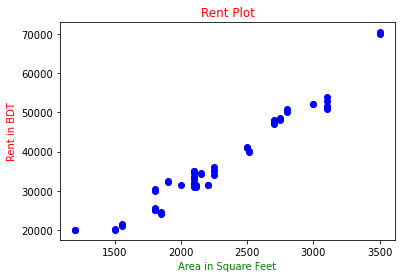

In [7]:
plt.scatter(df['area'],df['rent'],color = 'blue')
plt.xlabel('Area in Square Feet',color = 'Green')
plt.ylabel('Rent in BDT', color = 'Red')
plt.title('Rent Plot',color = 'Red')

In [8]:
df.area.mean()

2289.0

In [9]:
df.rent.mean()

37269.166666666664

# Separate dependent and independent variable

In [10]:
x = df[['area']]

In [11]:
y = df['rent']

In [12]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [13]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

In [14]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


# Split the dataset

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#train 70%
#test 30%
xtrain, xtest, ytrain,ytest = train_test_split(x,y,test_size = .30)

In [17]:
xtrain.head()

,area
54,2800
15,3100
32,2500
16,1800
40,2150


In [18]:
xtrain.shape

(42, 1)

In [19]:
xtest.shape

(18, 1)

# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(xtrain, ytrain) #training the model

LinearRegression()

In [23]:
reg.predict([[2100]])

I:\Anconda\File\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33138.68253875])

In [24]:
import warnings
warnings.filterwarnings('ignore')


In [25]:
reg.predict([[2100]])

array([33138.68253875])

In [26]:
xtrain.head(2)

,area
54,2800
15,3100


In [27]:
ytrain.head(2)

54    51000
15    51500
Name: rent, dtype: int64

In [28]:
ytest.head()

14    34100
36    20200
6     20000
19    47000
2     41050
Name: rent, dtype: int64

In [29]:
ypred = reg.predict(xtest)
ypred

array([36418.37950902, 20019.89465768, 20019.89465768, 46257.47041983,
       41884.54112614, 27672.52092164, 28765.75324506, 55003.32900721,
       33357.32900344, 46257.47041983, 52816.86436037, 26579.28859822,
       33138.68253875, 52816.86436037, 33138.68253875, 13460.50071714,
       26579.28859822, 26579.28859822])

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mse = mean_squared_error(ytest,ypred)

In [32]:
mse

6087796.5040822495

In [33]:
from sklearn.metrics import mean_absolute_error

In [34]:
mae = mean_absolute_error(ytest, ypred)

In [35]:
mae

1842.1067824742624

In [36]:
m = reg.coef_

In [37]:
m

array([21.86464647])

In [38]:
c = reg.intercept_
c

-12777.075045006131

In [39]:
#y = (m * x) + c

result = m*2100+c
result

array([33138.68253875])

In [40]:
reg.predict([[2100]])

array([33138.68253875])

# Best fit line

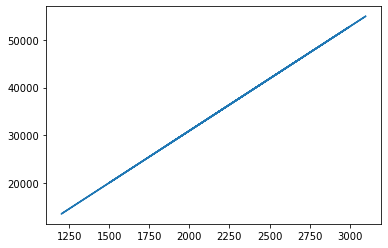

In [41]:
#Testing data set
pred = reg.predict(xtest)
plt.plot(np.squeeze(xtest), pred)

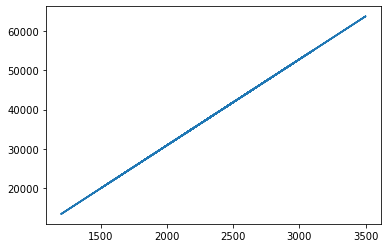

In [42]:
#Full data set
plt.plot(df.area, reg.predict(df[['area']]))

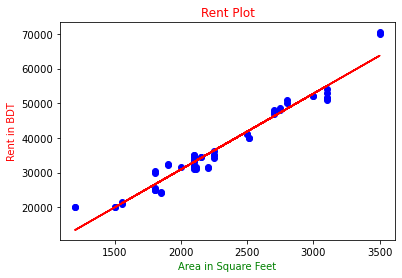

In [43]:
plt.scatter(df['area'],df['rent'],color = 'blue')
plt.xlabel('Area in Square Feet',color = 'Green')
plt.ylabel('Rent in BDT', color = 'Red')
plt.title('Rent Plot',color = 'Red')

plt.plot(df.area, reg.predict(df[['area']]), color = 'red')   #best fit

In [44]:
xtrain.head()

,area
54,2800
15,3100
32,2500
16,1800
40,2150


In [45]:
xtrain.to_csv('x2.csv')

In [49]:
x2 = pd.read_csv('x2.csv')

In [51]:
x2.drop('Unnamed: 0', axis = 1, inplace = True)

In [53]:
x2.head()

,area
0,2800
1,3100
2,2500
3,1800
4,2150


In [54]:
reg.predict(x2)

array([48443.93506667, 55003.32900721, 41884.54112614, 26579.28859822,
       34231.91486218, 33138.68253875, 26579.28859822, 63749.18759459,
       13460.50071714, 33138.68253875, 55003.32900721, 47350.70274325,
       46257.47041983, 63749.18759459, 36418.37950902, 55003.32900721,
       36418.37950902, 42103.18759082, 34231.91486218, 33138.68253875,
       55003.32900721, 33138.68253875, 33138.68253875, 21113.1269811 ,
       55003.32900721, 30952.21789191, 36418.37950902, 42103.18759082,
       35325.1471856 , 33138.68253875, 21113.1269811 , 33138.68253875,
       33357.32900344, 48443.93506667, 26579.28859822, 47350.70274325,
       46257.47041983, 35325.1471856 , 33138.68253875, 28765.75324506,
       33138.68253875, 27672.52092164])

In [55]:
reg.score(xtest, ytest)  #testing accuracy

0.951106523892425

In [56]:
reg.score(xtrain, ytrain)  #training accuracy

0.9472014026152323